In [2]:
import pandas as pd
#pd.set_option('display.max_rows', None)


In [3]:
all_votes_df = pd.read_json('all_votes_df.json')

In [4]:
#all_votes_df.head()

# Proposals DF

In [7]:
proposals_df = pd.read_json('proposals_df.json')

In [8]:
proposals_df.head()

,proposal_id,title,body,choices,scores,scores_total,votes,category,percentage_for,result
0,0x81ba2833504ea67c0d82e923a500afb54aa62ca74eed...,"IIP-108: Sunset IIP nos. 48, 62, and 96",Status: Proposed\nAuthors: @mel.eth @oneski22 ...,"[FOR, AGAINST]","[56558.02533444, 0]",56558.025334,68,IIP,1.000000,1
1,QmaGZeBayJGQpFZWYSxrKndyf65ukyeTd9bFqjpDcbWMHG,"[COMPOUND-71] Risk Parameter Updates for DAI, ...",This proposal is for voting on Compound's prop...,"[For, Against]","[14063.7505424226, 25]",14088.750542,52,Metagovernance,0.998226,1
2,QmPmuC4JZKy4kYqA7eBGHAgzpQUQNyGCb3wRZUudBKP3GN,[COMPOUND-70] Security Solutions For Compound ...,This proposal is for voting on Compound's prop...,"[For, Against]","[15644.7386521369, 209.7594145359]",15854.498067,56,Metagovernance,0.986770,1
3,QmTsi5WNdBknEBKEjXnzR5PRGRtv9FFLRYyoo5KzoJkvmB,[AAVE-undefined] Authorize the Guardian to hol...,This proposal is for voting on Aave's proposal...,"[For, Against]","[14326.0824128177, 33.6136264365]",14359.696039,33,Metagovernance,0.997659,1
5,QmVxXii1pWq3b7Hpw24pmqebNb1svehcHWwJke3Q1SPEaR,[AAVE-undefined] Add Fireblocks as a whitelist...,This proposal is for voting on Aave's proposal...,"[For, Against]","[40177.6755701185, 0]",40177.675570,22,Metagovernance,1.000000,1


In [9]:
import matplotlib.pyplot as plt

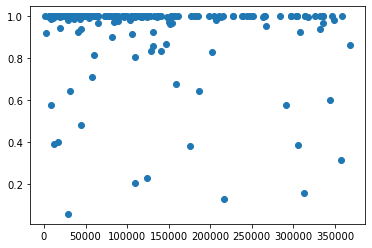

In [10]:
plt.scatter(proposals_df['scores_total'],proposals_df['percentage_for'])

In [11]:
#proposals_df.sort_values(by='votes',ascending=False)

In [13]:
proposals_df = proposals_df[(proposals_df['percentage_for'] != 1) | (proposals_df['percentage_for'] != 0)]

In [10]:
#proposals_df.head()

In [14]:
merged_df = pd.merge(all_votes_df,proposals_df,left_on='proposal',right_on='proposal_id',how='inner')

In [95]:
#merged_df['choice'].value_counts()

In [96]:
#merged_df.head()

In [37]:
merged_df['coalition_vp'] = merged_df.apply(lambda row: row.scores[row.choice-1],axis=1)
merged_df['coalition_contribution'] = merged_df['vp']/merged_df['coalition_vp']
merged_df['is_winning_coalition'] = merged_df['choice']==merged_df['result']

In [41]:
merged_df

,vote_id,ipfs,voter,created,space,proposal,choice,vp,vp_by_strategy,vp_state,...,choices,scores,scores_total,votes,category,percentage_for,result,coalition_vp,coalition_contribution,is_winning_coalition
0,0x4c35589e3b6c3d21ef953a45706e4521d281116ab7be...,QmPoR2Pb2FxNA85ymWmSR1B63SvkYxXsTqf6iWt5nRRPvr,0xaAa604E8f5318373D1785766D4f7310AF6CC4891,1637255405000,index-coop.eth,0x940fea8c7965da18b12fc6a081478204d41cda975ca8...,1,22950.433092,"[0, 22950.4330921088]",final,...,"[FOR, AGAINST]","[335666.8629166403, 147.0129557]",335813.875872,63,DG1,0.999562,1,335666.862917,0.068373,True
1,0x610b571fa3bfc27980f68ecc18718a89a0c687157079...,QmcTZciba6W2tkGzXYho2ieECojtHxWpehmf8Qg8pxrr25,0x9829C7157889EE198cBc40208a8ABb29b3Ad2A2d,1637254465000,index-coop.eth,0x940fea8c7965da18b12fc6a081478204d41cda975ca8...,1,200.000000,"[200, 0]",final,...,"[FOR, AGAINST]","[335666.8629166403, 147.0129557]",335813.875872,63,DG1,0.999562,1,335666.862917,0.000596,True
2,0xe716442936922d7c664e35b822b19e6fd95992d0cc60...,QmZ9TeP4GMHRtZNm2KaTjGJPNyi4BvLwG53Bc7WZftMrLh,0xBd31D988151DE348C928254D5622148Fdf7AF73C,1637251811000,index-coop.eth,0x940fea8c7965da18b12fc6a081478204d41cda975ca8...,1,6313.927416,"[6313.9274159834, 0]",final,...,"[FOR, AGAINST]","[335666.8629166403, 147.0129557]",335813.875872,63,DG1,0.999562,1,335666.862917,0.018810,True
3,0xfc7ea7360964d40f8d1b48a7fcc38bba2e8e92e93440...,QmNg7wwudkAwzbVhyySz5U2vAVGng3ASAB55axykSb5tcz,0x4F4538e2553C61BCE747f73C5fE8133D4B383Dda,1637248363000,index-coop.eth,0x940fea8c7965da18b12fc6a081478204d41cda975ca8...,1,465.225939,"[465.2259387605, 0]",final,...,"[FOR, AGAINST]","[335666.8629166403, 147.0129557]",335813.875872,63,DG1,0.999562,1,335666.862917,0.001386,True
4,0x3faf87b652187d4614fe28eaafa91532bea119941574...,QmPtXXoyyYrKPRRuDB9d4coRKw1r2Gm8vXgTufc6EEqoys,0x37B2691f9129a879913C5775307bEF89A77815D4,1637247438000,index-coop.eth,0x940fea8c7965da18b12fc6a081478204d41cda975ca8...,1,693.016741,"[693.0167413626, 0]",final,...,"[FOR, AGAINST]","[335666.8629166403, 147.0129557]",335813.875872,63,DG1,0.999562,1,335666.862917,0.002065,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12302,QmTcKTXDUZm9UHXMpDibudqaApWk9cbkboAe2sbA9WUUve,QmTcKTXDUZm9UHXMpDibudqaApWk9cbkboAe2sbA9WUUve,0x506f92308f4D9A2f764D80C68Ebc50830A2F7a11,1605735910000,index-coop.eth,QmR8dNJPcZTcmSP5g86iaGUiArs9DeYTEZkSf7Dg2hVavS,1,96.762492,"[50, 0, 46.7624921994, 0]",final,...,"[For, Against]","[39436.7385553704, 0]",39436.738555,46,Metagovernance,1.000000,1,39436.738555,0.002454,True
12303,QmVT6NB5niMwk6U9v9kVTe8gfsYJfpAV3gd3RXPYBvzDW4,QmVT6NB5niMwk6U9v9kVTe8gfsYJfpAV3gd3RXPYBvzDW4,0x21F3EF56CD8bAfD9448515E4508077C16eCC1f35,1605735757000,index-coop.eth,QmR8dNJPcZTcmSP5g86iaGUiArs9DeYTEZkSf7Dg2hVavS,1,323.882369,"[150, 0, 173.8823689413, 0]",final,...,"[For, Against]","[39436.7385553704, 0]",39436.738555,46,Metagovernance,1.000000,1,39436.738555,0.008213,True
12304,QmcjSt2xVdZav7iwCvvfqXPW74QUjpmB6cZWhob93SEL9E,QmcjSt2xVdZav7iwCvvfqXPW74QUjpmB6cZWhob93SEL9E,0x042a135bd342910ad7F67bBda74e3fd4125D1272,1605734635000,index-coop.eth,QmR8dNJPcZTcmSP5g86iaGUiArs9DeYTEZkSf7Dg2hVavS,1,14823.008347,"[14707.5860850794, 0, 115.4222616452, 0]",final,...,"[For, Against]","[39436.7385553704, 0]",39436.738555,46,Metagovernance,1.000000,1,39436.738555,0.375868,True
12305,QmYB1FvLUc3Sjh7n5tXE81xWMpF5uBatjMtYfnp9cTpuV2,QmYB1FvLUc3Sjh7n5tXE81xWMpF5uBatjMtYfnp9cTpuV2,0xBa71dFe1801d125Ba201e8beBf7f0b9764d4b19b,1605734593000,index-coop.eth,QmR8dNJPcZTcmSP5g86iaGUiArs9DeYTEZkSf7Dg2hVavS,1,504.139544,"[495.4854162242, 0, 8.6541275031, 0]",final,...,"[For, Against]","[39436.7385553704, 0]",39436.738555,46,Metagovernance,1.000000,1,39436.738555,0.012783,True


In [43]:
import matplotlib.pyplot as plt

In [57]:
winning_coalition_df = merged_df[merged_df['is_winning_coalition']]
winning_coalition_df.sort_values(by='coalition_contribution',ascending=False).to_csv('jank.csv')

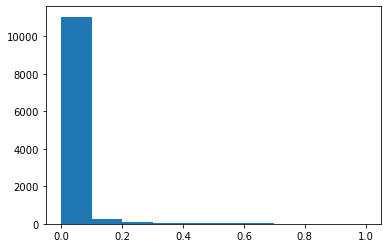

In [52]:
plt.hist(merged_df[merged_df['is_winning_coalition']]['coalition_contribution'], )#density=True)
plt.show()

# Kingmaker

### If you voted the other way, would the result change

In [69]:
def winning_threshold(choice,category):
    if category == 'DG2':
        if choice == 1:
            return .6
        else:
            return .4
    else:
        return .5
    
def is_deciding_vote(row):
    '''
    Assuming that a vote is ALREADY on the winning side,
    A vote is a considered a deciding vote if the following statement holds:
    'If the vote had switched sides, then it would have still been on the winning side.'
    '''
    vp = row['vp']
    choice = row['choice']
    category = row['category']
    scores_total = row['scores_total']
    coalition_vp = row['coalition_vp']
    #old_choice = choice
    #old_my_team_score= coalition_vp
    #old_enemy_team_score = scores_total-coalition_vp

    new_choice = (choice) % 2 + 1 # 1 goes to 2, 2 goes to 1
    new_coalition_vp = scores_total-(coalition_vp-vp)


    new_percentage = new_coalition_vp/scores_total

    new_wins = new_percentage > winning_threshold(new_choice,category)

    return new_wins

In [70]:
winning_coalition_df['is_deciding_vote'] = winning_coalition_df.apply(is_deciding_vote,axis=1)


<ipython-input-70-9e5b75dd858a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winning_coalition_df['is_deciding_vote'] = winning_coalition_df.apply(is_deciding_vote,axis=1)


In [93]:
deciding_vote_df = winning_coalition_df.sort_values(by='coalition_contribution',ascending=False).groupby(['voter','is_deciding_vote']).size()\
                       .reset_index(name='counts')\
                       .pivot_table(index='voter',columns='is_deciding_vote',values='counts',fill_value=0)\
                       .sort_values(by=True,ascending=False)

In [94]:
deciding_vote_df

is_deciding_vote,False,True
voter,,
0x8627be8D8b6D250c87f802D0c48C26FA807A0857,0,25
0x042a135bd342910ad7F67bBda74e3fd4125D1272,77,11
0x4a3e950c35c6d9c2d8f5F0a6CC03aF9942134840,12,8
0x365047213ABe97401e8Bfa2c48D12d2731601F98,0,6
0xe1B6e4C28127C4704838A0a2d6c6F7c344944B22,7,6
...,...,...
0x54073942343E364e4e220075592B39E9512d5629,1,0
0x544C7D7f4F407b1B55D581CcD563c7Ca8aCfC686,2,0
0x545566c183401f6A3f0622e0023c7Be10620D36a,1,0
